__Ejercicio 3:__ Implementar método de Simpson de la misma forma que el ejercicio anterior.

In [1]:
#De manera similar a la tarea anterior. Hacemos esto para poder meter a f en nuestras otras funciones
function f(x);
    x^2
end;

In [2]:
function integracion_simpson(f,a,b,numparticiones)
    anchorec = (b-a)/numparticiones                     #practicamente lo mismo que el metodo del rectangulo
    s = []
    suma = 0.0                    
    area = 0.0                                          
    ainit = a                       
    for i in 1:numparticiones                         
        b = (anchorec)*(i) +ainit                      
        a = ainit+(anchorec)*(i-1)              
        area = ((b-a)/6)*((f(a)+4f((a+b)/2)+f(b)))      #p.d. regla de simpson
        push!(s,area)
    end
    suma = sum(s,1:numparticiones)
    return suma
end;

In [3]:
integracion_simpson(f,0,5,10000)

1-element Array{Float64,1}:
 41.6667

__Ejercicio 4:__ Implementar método de interpolación de Lagrange en `Julia`. La función deberá recibir la lista de puntos $(x_k,y_k)$ y el _lugar donde evaluamos el polinomio_, note que es particularmente útil si los _inputs_ son las listas de las $x$'s y de las $y$'s separadamente, es decir, de la misma forma en como la función `plot` recibe los argumentos; esto servira para verificar nuestros resultados. EJ.: `Interpolador(listx,listy,x)`.
* Interpole las funciones $\cos(x)$, $\cos^2(x)$ tomando un arreglo de $10$ puntos distribuidos uniformemente dentro del dominio $[0,2 \pi]$, donde el primer punto sea $0$ y el último $2\pi$. Grafique los puntos a interpolar y la funcion interpoladora.
* Interpole los los siguientes puntos: `[(0,10),(2,-10),(3,-4),(4,0),(5,5),(6,20),(7,-1)]`.Grafique los puntos a interpolar y la funcion interpoladora.
* Para los ejercicios anteriores evalue la función que interpola en una variable simbólica, para que nos permita ver la forma explicita del polinomio. Ej: `Interpolador(listx,listy,Sym("x"))`. 

__Tip:__ Pueden hacer separadamente la rutina para $l_j(x)$, luego la de $L(x)$ utilizando la rutina que ya tenemos para $l_j(x)$. Por Ej: `funciondelabase(j,listx,x)`, donde $x$ es el lugar donde evaluamos la función interpoladora.

In [4]:
using SymPy
using PyPlot

In [5]:
x = Sym("x"); #Lo vemos como variable simbolica a nivel global, nos será util a la hora de hacer los varios plots que haremos

In [6]:
function interpolacion_lag(listx,listy,a_evaluar)
    listax = collect(listx)              #Simplemente es la lista donde estan todos los x de listx
    listay = collect(listy)              #lo mismo para y
    x = Sym("x")                         #Para estar seguros...
    pol_inter=0                          #Aqui es donde se va a sumar todo
    
    for i in 1:length(listax)             #Ciclo for, donde se meten todas las x
        j = 1                            
        l = 1                            #neutro multiplicativo
        while j<=length(listay)          #fool-proof: no queremos que esto siga despues de todos los elementos de listay 
           if j==i      #todas las bases pol. son cero en j = i
           j = j+1
           else         #si no...
            l = l*(x-listax[j])/(listax[i]-listax[j]) #aqui se multiplica una base polinomial dada a l, haciendo que se genere toda l
            j = j+1
           end
        end
        pol_inter = pol_inter + listay[i]*l    #viene siendo la suma
    end
    
    pol_inter = simplify(pol_inter)           #si no sería una catastrofe de polinomio
    pol_final = lambdify(pol_inter,[x])
    return pol_final(a_evaluar)
    
    end;

In [7]:
#Aquí definimos listx,listy, por motivos de comodidal
listx_1 = linspace(0,2*pi,10);
listy_1 = cos.(listx_1);

In [28]:
#Bautizamos las entradas de nuestro plot

interpolacion_cos = lambdify(interpolacion_lag(listx_1,listy_1,Sym("x")),[x]) #algo sucio, se vería mal dentro del plot
x_plot_1 = linspace(0, 2*pi, 1000);      #las x
y_plot_1 = interpolacion_cos.(x_plot_1); #la y donde es el pol. lag.

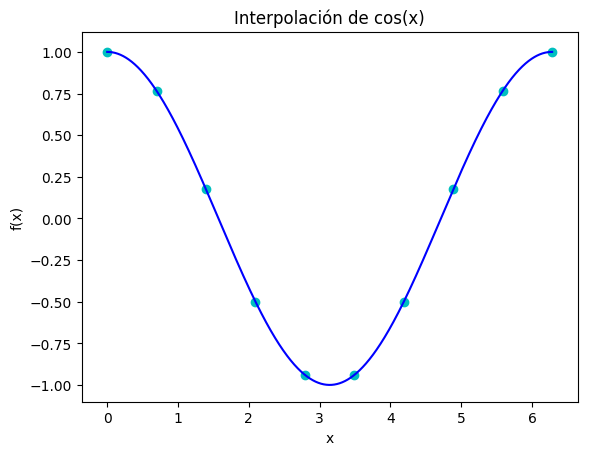

In [9]:
#Enbellecemos la grafica
xlabel("x")
ylabel("f(x)")
title("Interpolación de cos(x)")
plot(x_plot_1, y_plot_1,color="b")
scatter(listx_1,listy_1,color="c") #Los puntos azul cielo
show();

In [10]:
interpolacion_lag(listx_1,listy_1,Sym("x"))         #El pol. explicito

                     9                        8                         7     
5.6920614055489e-18*x  - 1.97979336359535e-5*x  + 0.000497576342935013*x  - 0.

                   6                        5                       4         
00411366974808214*x  + 0.00878850466172487*x  + 0.0243778891541915*x  + 0.0201

              3                      2                            
425548285172*x  - 0.512543349763835*x  + 0.003132547207505*x + 1.0

In [11]:
#Se sigue de lo antes descrito
function coseno_cuadrado(x)
     return cos(x)cos(x)
end;

In [12]:
listx_2 = linspace(0,2*pi,10);
listy_2 = coseno_cuadrado.(listx_2);

interpolacion_cos = lambdify(interpolacion_lag(listx_2,listy_2,Sym("x")),[x])
x_plot_2 = linspace(0, 2*pi, 1000);
y_plot_2 = interpolacion_cos.(x_plot_2);

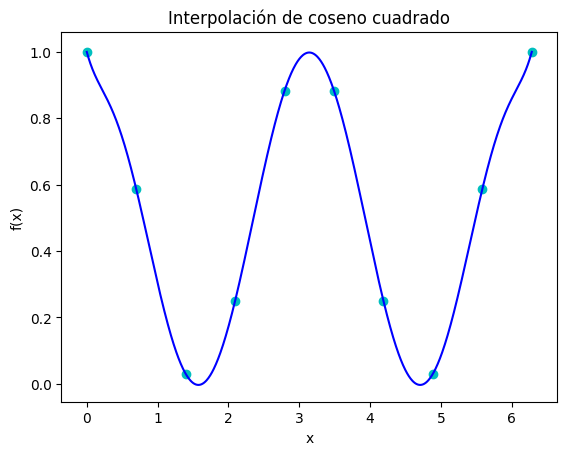

In [13]:
xlabel("x")
ylabel("f(x)")
title("Interpolación de coseno cuadrado")
plot(x_plot_2, y_plot_2,color="b")
scatter(listx_2,listy_2,color="c")
show();

In [14]:
listx_3 = [0,2,3,4,5,6,7];
listy_3 = [10,-10,-4,0,5,20,-1];

interpolacion_listas = lambdify(interpolacion_lag(listx_3,listy_3,Sym("x")),[x])
x_plot_3 = linspace(0, 7, 1000);
y_plot_3 = interpolacion_listas.(x_plot_3);

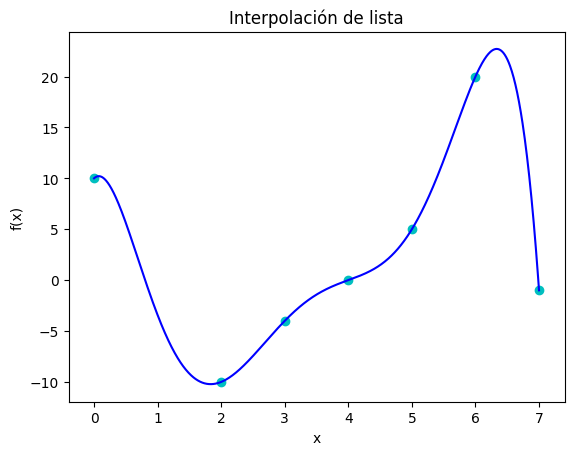

In [15]:
xlabel("x")
ylabel("f(x)")
title("Interpolación de lista")
plot(x_plot_3, y_plot_3,color="b")
scatter(listx_3,listy_3,color="c")
show();

In [16]:
interpolacion_lag(listx_3,listy_3,Sym("x"))

       6        5         4         3          2            
  173*x    113*x    4957*x    2731*x    54571*x    83*x     
- ------ + ------ - ------- + ------- - -------- + ---- + 10
   2520      84       504        84       1260      14      

__Ejercicio 5:__ Comparen como convergen los métodos al valor exacto de la integral, respeco al ancho de las celdas, háganlo para $f(x)=-\sin(x)$, integrando en el intervalo $[0,2\pi]$. Es decir, para los tres métodos fijen el ancho de la celda y haganla cada vez mas pequeña, grafiquen el valor de la integral contra el inverso del acho de la celda, es decir $\int f(x) dx$ contra $1/\Delta x$. Hagan esto para los tres métodos y ponganlo en una gráfica y comenten lo que observan.]

In [17]:
function f(x);
   -sin(x)
end;

In [18]:
function integracion_rectangulo(f,a,b,numparticiones)        #Copy-paste de las funciones hechas en tarea 6
    anchorec = (b-a)/numparticiones                     
    s = []                                             
    suma = 0.0                                          
    area = 0.0                                          
    ainit = a                                          
    for i in 1:numparticiones                           
        b = (anchorec)*(i) +ainit                       
        a = ainit+(anchorec)*(i-1)              
        area = (b-a)*(f((b+a)/2))                       
        push!(s,area)                                   
    end
    suma = sum(s,1:numparticiones)                      
    return suma
end;

In [19]:
function integracion_trapecio(f,a,b,numparticiones)
    anchorec = (b-a)/numparticiones                     
    s = []
    suma = 0.0                    
    area = 0.0                                          
    ainit = a                       
    for i in 1:numparticiones                         
        b = (anchorec)*(i) +ainit                      
        a = ainit+(anchorec)*(i-1)              
        area = (b-a)*((f(a)+f(b))/2)                      
        push!(s,area)
    end
    suma = sum(s,1:numparticiones)
    return suma
end;

In [20]:
function grafica_convergencia(f,a,b,numparticiones)
    lista_particiones = collect(numparticiones)
    lista_riemann = []            #Listas vacías donde se guardaran los valores de las integrales
    lista_trapecio = []
    lista_simpson = []
    r = 0.0                       #Necesario para subir un valor a la lista
    t = 0.0
    s = 0.0
    for i in 1:length(lista_particiones)      #Ciclo for, para que en cada numero de particiones se generen nuevos valores que dan a las listas con el push
        r = integracion_rectangulo(f,a,b,lista_particiones[i])
        t = integracion_trapecio(f,a,b,lista_particiones[i])
        s = integracion_simpson(f,a,b,lista_particiones[i])
        push!(lista_riemann,r)
        push!(lista_trapecio,t)
        push!(lista_simpson,s)
    end
    #Embellecemos la grafica y ploteamos los tres metodos en una sola
    xlabel("1/Δx")
    ylabel("Integral de f(x)")
    title("Convergencia al valor exacto de la integral")
    plot(lista_particiones/(b-a),lista_riemann,color="r")
    plot(lista_particiones/(b-a),lista_trapecio,color="b")
    plot(lista_particiones/(b-a),lista_simpson,color="m")
end;

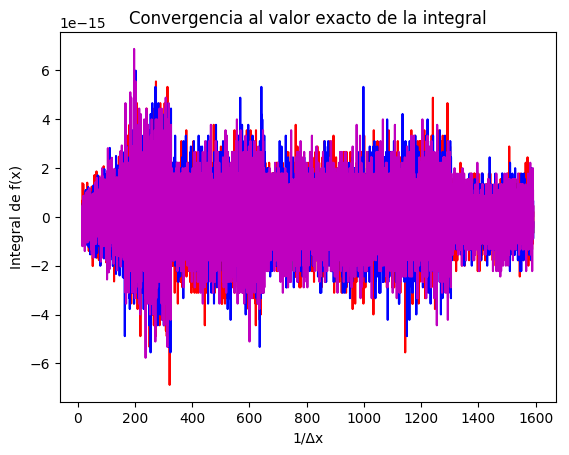

In [21]:
grafica_convergencia(f,0,2*pi,100:10000);

Esto se debe principalmente a un problema en los senos, el cual se puede observar de la sig. manera:

In [22]:
sin(0)

0.0

In [23]:
sin(pi)

1.2246467991473532e-16

In [24]:
sin(2*pi)          #Como podemos arreglar esto?

-2.4492935982947064e-16

In [25]:
cos(pi/2)       #Tambien para cos

6.123233995736766e-17

Sabemos que sen(n*pi) es 0. Si no existiera esta problematica, la gráfica se vería de manera similar a la siguiente:

In [26]:
function g(x);
   x^2+3x+1
end;

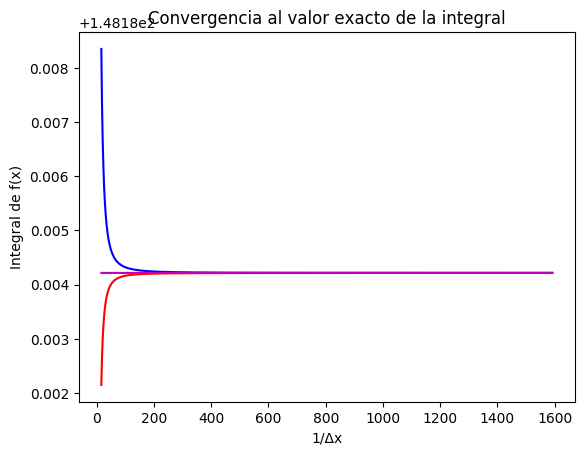

In [27]:
grafica_convergencia(g,0,2*pi,100:10000);

En donde se observa que los tres metodos de integración convergen a la integral "exacta" poco despues de que 1/Δx supera las 400 unidades.
En este caso, el metodo de simpson converge al instante, siguiendole el metodo del rectangulo y despues el metodo del trapecio